In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable
import kmapper as km
import pyballmapper as pbm
import statistics
import seaborn as sns
from matplotlib.colors import ListedColormap
from matplotlib import colormaps as cm
from sklearn import preprocessing
import networkx as nx

In [91]:
US_full_dataset=pd.read_csv('US results/Output datasets/US_fulldataset.csv')
UK_full_dataset=pd.read_csv('UK results/Output datasets/UK_fulldataset.csv')

In [92]:
df_UK=UK_full_dataset[['ONSConstID','Constituency','age_under18',
       'age_1824', 'age_2534', 'age_3549', 'age_5064', 'age_over65', 'Urban','White','nssec_unemployed','qunone','qu4','Con2019','Con2015','County name']]

In [93]:
df_US=US_full_dataset[['GEO_ID','county_name','Under18',
       '18to24', '25to34', '35to49', '50to64', 'Over65', 'White','Unemployment raw value','Poor or fair health raw value','REPUBLICAN_2016','REPUBLICAN_2012','state']]

## Additional US data

In [94]:
df_US['gains']=df_US['REPUBLICAN_2016']-df_US['REPUBLICAN_2012']

/var/folders/xf/8y4gbp61673b4f2br89yscz40000gn/T/ipykernel_53130/2422088704.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_US['gains']=df_US['REPUBLICAN_2016']-df_US['REPUBLICAN_2012']


### Education

In [95]:
df=pd.read_csv('US_data/educationv2.csv')
df['GEO_ID'] = df['GEO_ID'].str.replace('0500000US', '', regex=False).astype(int)

In [96]:
edu_data=df[['GEO_ID']]
edu_data['No_qualifications']=(df['less_than_hs_18to24']+df['less_9grade_over25']+df['9to12grade_over25'])*100/(df['pop_18to24']+df['pop_25over'])
edu_data['Degree']=(df['degree_18to24']+df['degree_over25']+df['graduatedegree_over25'])*100/(df['pop_18to24']+df['pop_25over'])


/var/folders/xf/8y4gbp61673b4f2br89yscz40000gn/T/ipykernel_53130/45692669.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edu_data['No_qualifications']=(df['less_than_hs_18to24']+df['less_9grade_over25']+df['9to12grade_over25'])*100/(df['pop_18to24']+df['pop_25over'])
/var/folders/xf/8y4gbp61673b4f2br89yscz40000gn/T/ipykernel_53130/45692669.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edu_data['Degree']=(df['degree_18to24']+df['degree_over25']+df['graduatedegree_over25'])*100/(df['pop_18to24']+df

In [97]:
df_US=df_US.merge(edu_data,on='GEO_ID')

### Poverty

In [98]:
child_poverty_data=pd.read_csv('US_Data/child_poverty.csv')
child_poverty_data['GEO_ID'] = child_poverty_data['GEO_ID'].str.replace('0500000US', '', regex=False).astype(int)
child_poverty_data=child_poverty_data[child_poverty_data['child_poverty']!='-']
child_poverty_data['child_poverty']=child_poverty_data['child_poverty'].astype(float)
df_US=df_US.merge(child_poverty_data,on='GEO_ID')

In [99]:
child_poverty_data.dtypes

GEO_ID             int64
child_poverty    float64
dtype: object

### Income

In [100]:
income_data=pd.read_csv('US_data/income.csv')
income_data['GEO_ID'] = income_data['GEO_ID'].str.replace('0500000US', '', regex=False).astype(int)

income_data = income_data[income_data['median_income'] != '-']
income_data['median_income']=income_data['median_income'].astype(int)

In [101]:
df_US=df_US.merge(income_data, on='GEO_ID')

### Urban

In [102]:
df=pd.read_csv('US_data/urban.csv')
df['Urban']=(df['Urban']/df['Pop'])*100
urban_data=df[['GEO_ID','Urban']]
urban_data['GEO_ID'] = urban_data['GEO_ID'].str.replace('0500000US', '', regex=False).astype(int)

/var/folders/xf/8y4gbp61673b4f2br89yscz40000gn/T/ipykernel_53130/1650947853.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  urban_data['GEO_ID'] = urban_data['GEO_ID'].str.replace('0500000US', '', regex=False).astype(int)


In [103]:
df_US=df_US.merge(urban_data,on='GEO_ID')

## Additional UK data

In [104]:
df_UK['gains']=df_UK['Con2019']-df_UK['Con2015']

/var/folders/xf/8y4gbp61673b4f2br89yscz40000gn/T/ipykernel_53130/2489715964.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_UK['gains']=df_UK['Con2019']-df_UK['Con2015']


### Poverty

In [105]:
df = pd.read_excel('UK data/Child Poverty.xlsx', sheet_name='Constituency data table')

cols = ['ONSConstID',
        'Year',
         'Constituency absolute rate']

data = df[cols]
pv = data.pivot(index=['ONSConstID'], columns='Year', values='Constituency absolute rate')
pv=pv.reset_index()

In [106]:
df_UK['Poverty']=pv['2021/22'].astype(float)*100

/var/folders/xf/8y4gbp61673b4f2br89yscz40000gn/T/ipykernel_53130/2747999422.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_UK['Poverty']=pv['2021/22'].astype(float)*100


### Health

In [107]:
df = pd.read_excel('UK data/Health and Disability (2).xlsx', sheet_name='Health status')

cols = ['ONSConstID',
        'Health status',
         'Constituency proportion']

data = df[cols]
pv = data.pivot(index=['ONSConstID'], columns='Health status', values='Constituency proportion')
pv=pv.reset_index()

In [108]:
pv

Health status ONSConstID  Bad health  Fair health  Good health  \
0              E14000530    0.028739     0.116184     0.351172   
1              E14000531    0.045485     0.145789     0.353661   
2              E14000532    0.027724     0.097896     0.297958   
3              E14000533    0.047634     0.150171     0.358784   
4              E14000534    0.029826     0.116719     0.341191   
..                   ...         ...          ...          ...   
568            W07000076    0.062623     0.150500     0.315209   
569            W07000077    0.059966     0.156370     0.330521   
570            W07000078    0.045998     0.135431     0.327247   
571            W07000079    0.049674     0.126218     0.313998   
572            W07000080    0.049861     0.126192     0.318149   

Health status  Very bad health  Very good health  
0                     0.007407          0.496498  
1                     0.013880          0.441186  
2                     0.008370          0.568052  
3                     0.012975          0.430436  
4                     0.008088          0.504176  
..                         ...               ...  
568                   0.019305          0.452363  
569                   0.019943          0.433199  
570                   0.014609          0.476715  
571                   0.015973          0.494137  
572                   0.016785          0.489014  

[573 rows x 6 columns]

In [109]:
df_UK['Poor_fair_health']=pv['Bad health']+pv['Fair health']*100

/var/folders/xf/8y4gbp61673b4f2br89yscz40000gn/T/ipykernel_53130/71108992.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_UK['Poor_fair_health']=pv['Bad health']+pv['Fair health']*100


### Income

In [110]:
df = pd.read_excel('UK data/Wages (1).xlsx', sheet_name='Data')

cols = ['ONSConstID',
         'WageMedianConst']

data = df[cols]

In [111]:
data['WageMedianConst']=data['WageMedianConst']*52

/var/folders/xf/8y4gbp61673b4f2br89yscz40000gn/T/ipykernel_53130/2614600532.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['WageMedianConst']=data['WageMedianConst']*52


In [112]:
df_UK=df_UK.merge(data, on='ONSConstID')

In [113]:
df_UK = df_UK.rename(columns={
    'age_under18': 'Under18',
    'age_1824': '18to24',
    'age_2534': '25to34',
    'age_3549': '35to49',
    'age_5064': '50to64',
    'age_over65': 'Over65',
    'nssec_unemployed':'Unemployment',
    'Con2019':'Vote_share_after',
    'Con2015':'Vote_share_before',
    'Constituency':'Name',
    'qu4':'Degree',
    'qunone':'No_qualifications',
    'ONSConstID':'ID',
    'Poverty':'child_poverty',
    'WageMedianConst':'income',
    'County name':'Area'
})
df_US=df_US.rename(columns={
    'REPUBLICAN_2016':'Vote_share_after',
    'REPUBLICAN_2012':'Vote_share_before',
    'county_name':'Name',
    'Poor or fair health raw value':'Poor_fair_health',
    'Unemployment raw value':'Unemployment',
    'GEO_ID':'ID',
    'median_income':'income',
    'state':'Area'
})

In [114]:
df_UK['UK']=1 
df_US['UK']=0

In [115]:
df_US.dtypes

ID                     int64
Name                  object
Under18              float64
18to24               float64
25to34               float64
35to49               float64
50to64               float64
Over65               float64
White                float64
Unemployment         float64
Poor_fair_health     float64
Vote_share_after     float64
Vote_share_before    float64
Area                  object
gains                float64
No_qualifications    float64
Degree               float64
child_poverty        float64
income                 int64
Urban                float64
UK                     int64
dtype: object

## Summary Tables

In [116]:
df_UK.columns

Index(['ID', 'Name', 'Under18', '18to24', '25to34', '35to49', '50to64',
       'Over65', 'Urban', 'White', 'Unemployment', 'No_qualifications',
       'Degree', 'Vote_share_after', 'Vote_share_before', 'Area', 'gains',
       'child_poverty', 'Poor_fair_health', 'income', 'UK'],
      dtype='object')

In [117]:
summary=df_UK[['Under18', '18to24', '25to34', '35to49', '50to64',
       'Over65', 'Urban', 'White', 'Unemployment', 'No_qualifications',
       'Degree','child_poverty', 'Poor_fair_health', 'income']].describe()
summary=summary.transpose()
summary=summary.round(2)
summary = summary.applymap(lambda x: '{:.2f}'.format(x).rstrip('0').rstrip('.'))

/var/folders/xf/8y4gbp61673b4f2br89yscz40000gn/T/ipykernel_53130/4216626634.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  summary = summary.applymap(lambda x: '{:.2f}'.format(x).rstrip('0').rstrip('.'))


In [118]:
latex_code = summary.to_latex(index=True)
print(latex_code)

\begin{tabular}{lllllllll}
\toprule
 & count & mean & std & min & 25% & 50% & 75% & max \\
\midrule
Under18 & 571 & 20.63 & 2.64 & 11.34 & 18.93 & 20.49 & 22.22 & 31.03 \\
18to24 & 571 & 8.15 & 3.72 & 5.1 & 6.21 & 6.91 & 8.32 & 30.34 \\
25to34 & 571 & 13.18 & 3.31 & 8.02 & 11.09 & 12.76 & 14.14 & 30.63 \\
35to49 & 571 & 19.03 & 2.2 & 13.52 & 17.62 & 18.79 & 20.37 & 26.78 \\
50to64 & 571 & 19.73 & 2.53 & 10.39 & 18.32 & 20.22 & 21.46 & 25.19 \\
Over65 & 571 & 19.28 & 5.45 & 5.1 & 15.78 & 19.4 & 23.01 & 35.18 \\
Urban & 571 & 81.21 & 24.29 & 0 & 67.86 & 93.64 & 100 & 100 \\
White & 571 & 83.32 & 17.19 & 19.79 & 76.94 & 90.22 & 95.94 & 98.55 \\
Unemployment & 571 & 8.5 & 3.11 & 4.12 & 6.13 & 7.81 & 10.22 & 24.75 \\
No_qualifications & 571 & 18.34 & 4.51 & 7.63 & 14.83 & 17.82 & 21.28 & 32.84 \\
Degree & 571 & 33.28 & 8.9 & 17.5 & 26.77 & 31.95 & 37.37 & 65.49 \\
child_poverty & 571 & 14.46 & 6.72 & 3.4 & 9.5 & 13.4 & 17.45 & 46.3 \\
Poor_fair_health & 571 & 12.77 & 1.91 & 7.32 & 11.3 & 12

In [119]:
summary=df_US.describe()
summary=summary.transpose()
summary=summary.round(2)
summary = summary.applymap(lambda x: '{:.2f}'.format(x).rstrip('0').rstrip('.'))

/var/folders/xf/8y4gbp61673b4f2br89yscz40000gn/T/ipykernel_53130/127125043.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  summary = summary.applymap(lambda x: '{:.2f}'.format(x).rstrip('0').rstrip('.'))


In [120]:
latex_code = summary.to_latex(index=True)
print(latex_code)

\begin{tabular}{lllllllll}
\toprule
 & count & mean & std & min & 25% & 50% & 75% & max \\
\midrule
ID & 3152 & 30865.11 & 15086 & 1001 & 19052.5 & 30008 & 46057.5 & 56045 \\
Under18 & 3152 & 22.54 & 3.44 & 3.9 & 20.5 & 22.5 & 24.3 & 40.3 \\
18to24 & 3152 & 9.07 & 3.81 & 0.7 & 7.4 & 8.2 & 9.5 & 55.7 \\
25to34 & 3152 & 11.67 & 2.28 & 0 & 10.3 & 11.4 & 12.8 & 26.9 \\
35to49 & 3152 & 18 & 2.15 & 4.9 & 16.7 & 18.1 & 19.3 & 29.4 \\
50to64 & 3152 & 21.13 & 2.81 & 5.2 & 19.6 & 21.2 & 22.6 & 44.8 \\
Over65 & 3152 & 17.58 & 4.46 & 3.9 & 14.8 & 17.2 & 19.9 & 53.1 \\
White & 3152 & 83.3 & 16.57 & 10.1 & 75.4 & 89.4 & 96 & 99.5 \\
Unemployment & 3152 & 6.23 & 2.23 & 1.19 & 4.67 & 6.02 & 7.49 & 23.62 \\
Poor_fair_health & 3152 & 16.94 & 4.95 & 7.2 & 13.1 & 16 & 20 & 41.7 \\
Vote_share_after & 3113 & 63.26 & 15.67 & 4.09 & 54.46 & 66.32 & 74.9 & 94.58 \\
Vote_share_before & 3113 & 59.57 & 14.85 & 7.19 & 50.28 & 60.72 & 70.27 & 95.86 \\
gains & 3113 & 3.69 & 5.67 & -37.62 & 0.66 & 3.67 & 7.24 & 23.12

## Unscaled combined

In [121]:
df_unscaled_combined = pd.concat([df_US, df_UK], ignore_index=True)

In [122]:
df_unscaled_combined

ID                       Name    Under18    18to24     25to34  \
0          1001                    AUTAUGA  25.200000  8.600000  12.200000   
1          1003                    BALDWIN  22.200000  7.700000  11.300000   
2          1005                    BARBOUR  21.500000  9.400000  13.800000   
3          1007                       BIBB  21.100000  9.200000  13.800000   
4          1009                     BLOUNT  23.600000  8.000000  11.500000   
...         ...                        ...        ...       ...        ...   
3718  W07000076                 Caerphilly  21.121663  6.854735  12.620162   
3719  W07000077                     Islwyn  20.034600  6.875788  12.893276   
3720  W07000078          Vale of Glamorgan  20.824043  6.392242  11.868561   
3721  W07000079               Cardiff West  22.878305  7.832528  14.729966   
3722  W07000080  Cardiff South and Penarth  22.052123  9.200897  17.044356   

         35to49     50to64     Over65      White  Unemployment  ...  \
0     21.000000  19.100000  14.000000  76.700000      5.883047  ...   
1     19.100000  21.000000  18.700000  88.000000      6.053720  ...   
2     19.100000  19.700000  16.500000  47.300000     10.809275  ...   
3     21.400000  19.700000  14.900000  77.500000      7.137850  ...   
4     19.800000  19.900000  17.200000  91.700000      6.146908  ...   
...         ...        ...        ...        ...           ...  ...   
3718  18.947699  20.305845  20.149896  97.427574      9.908694  ...   
3719  18.320682  20.949226  20.926428  97.942553      9.284181  ...   
3720  18.300208  20.627018  21.987929  95.197022      7.675003  ...   
3721  19.950622  18.402428  16.206152  83.039274     10.238578  ...   
3722  20.111322  17.013290  14.578012  77.462973     10.674613  ...   

      Vote_share_after  Vote_share_before                     Area      gains  \
0            72.766588          72.618252                  ALABAMA   0.148336   
1            76.545712          77.358269                  ALABAMA  -0.812557   
2            52.096666          48.223130                  ALABAMA   3.873537   
3            76.403220          72.826603                  ALABAMA   3.576617   
4            89.334844          86.465884                  ALABAMA   2.868961   
...                ...                ...                      ...        ...   
3718         27.880948          16.590125  Gwent and Mid Glamorgan  11.290823   
3719         28.797671          15.157764  Gwent and Mid Glamorgan  13.639907   
3720         49.820278          46.023824          South Glamorgan   3.796455   
3721         27.983628          25.150712          South Glamorgan   2.832916   
3722         28.954705          26.813380          South Glamorgan   2.141325   

      No_qualifications     Degree  child_poverty   income       Urban  UK  
0             13.149335  22.623556           16.7  31259.0   58.969199   0  
1             10.836125  27.434295           18.4  28534.0   67.184328   0  
2             25.686096  11.743857           44.8  23174.0   35.117920   0  
3             20.021329  10.776830           26.2  26704.0    0.000000   0  
4             19.785502  11.983312           26.5  31793.0    9.280318   0  
...                 ...        ...            ...      ...         ...  ..  
3718          22.920884  27.085576           19.5  30056.0   82.447037   1  
3719          23.807104  24.720114           16.3  34699.6   89.005653   1  
3720          16.272586  34.908460            7.0  34595.6   75.383323   1  
3721          19.235406  39.701421           12.6  33930.0   94.812793   1  
3722          19.893298  37.534235           12.1  30830.8  100.000000   1  

[3723 rows x 21 columns]

In [123]:
df_unscaled_combined['UK_voteshare_19'] = np.nan
df_unscaled_combined['US_voteshare_16'] = np.nan
df_unscaled_combined['UK_voteshare_15'] = np.nan
df_unscaled_combined['US_voteshare_12'] = np.nan
df_unscaled_combined['US_votegains'] = np.nan
df_unscaled_combined['UK_votegains'] = np.nan

# Set 'UK_voteshare' to 'uk vote share' where 'Country' is 'UK'
df_unscaled_combined.loc[df_unscaled_combined['UK'] == 1, 'UK_voteshare19'] = df_unscaled_combined['Vote_share_after']
df_unscaled_combined.loc[df_unscaled_combined['UK'] == 0, 'US_voteshare16'] = df_unscaled_combined['Vote_share_after']
df_unscaled_combined.loc[df_unscaled_combined['UK'] == 1, 'UK_voteshare15'] = df_unscaled_combined['Vote_share_before']
df_unscaled_combined.loc[df_unscaled_combined['UK'] == 0, 'US_voteshare12'] = df_unscaled_combined['Vote_share_before']
df_unscaled_combined.loc[df_unscaled_combined['UK'] == 1, 'UK_votegains'] = df_unscaled_combined['gains']
df_unscaled_combined.loc[df_unscaled_combined['UK'] == 0, 'US_votegains'] = df_unscaled_combined['gains']


In [124]:
df_unscaled_combined

ID                       Name    Under18    18to24     25to34  \
0          1001                    AUTAUGA  25.200000  8.600000  12.200000   
1          1003                    BALDWIN  22.200000  7.700000  11.300000   
2          1005                    BARBOUR  21.500000  9.400000  13.800000   
3          1007                       BIBB  21.100000  9.200000  13.800000   
4          1009                     BLOUNT  23.600000  8.000000  11.500000   
...         ...                        ...        ...       ...        ...   
3718  W07000076                 Caerphilly  21.121663  6.854735  12.620162   
3719  W07000077                     Islwyn  20.034600  6.875788  12.893276   
3720  W07000078          Vale of Glamorgan  20.824043  6.392242  11.868561   
3721  W07000079               Cardiff West  22.878305  7.832528  14.729966   
3722  W07000080  Cardiff South and Penarth  22.052123  9.200897  17.044356   

         35to49     50to64     Over65      White  Unemployment  ...  \
0     21.000000  19.100000  14.000000  76.700000      5.883047  ...   
1     19.100000  21.000000  18.700000  88.000000      6.053720  ...   
2     19.100000  19.700000  16.500000  47.300000     10.809275  ...   
3     21.400000  19.700000  14.900000  77.500000      7.137850  ...   
4     19.800000  19.900000  17.200000  91.700000      6.146908  ...   
...         ...        ...        ...        ...           ...  ...   
3718  18.947699  20.305845  20.149896  97.427574      9.908694  ...   
3719  18.320682  20.949226  20.926428  97.942553      9.284181  ...   
3720  18.300208  20.627018  21.987929  95.197022      7.675003  ...   
3721  19.950622  18.402428  16.206152  83.039274     10.238578  ...   
3722  20.111322  17.013290  14.578012  77.462973     10.674613  ...   

      UK_voteshare_19  US_voteshare_16  UK_voteshare_15 US_voteshare_12  \
0                 NaN              NaN              NaN             NaN   
1                 NaN              NaN              NaN             NaN   
2                 NaN              NaN              NaN             NaN   
3                 NaN              NaN              NaN             NaN   
4                 NaN              NaN              NaN             NaN   
...               ...              ...              ...             ...   
3718              NaN              NaN              NaN             NaN   
3719              NaN              NaN              NaN             NaN   
3720              NaN              NaN              NaN             NaN   
3721              NaN              NaN              NaN             NaN   
3722              NaN              NaN              NaN             NaN   

      US_votegains  UK_votegains  UK_voteshare19  US_voteshare16  \
0         0.148336           NaN             NaN       72.766588   
1        -0.812557           NaN             NaN       76.545712   
2         3.873537           NaN             NaN       52.096666   
3         3.576617           NaN             NaN       76.403220   
4         2.868961           NaN             NaN       89.334844   
...            ...           ...             ...             ...   
3718           NaN     11.290823       27.880948             NaN   
3719           NaN     13.639907       28.797671             NaN   
3720           NaN      3.796455       49.820278             NaN   
3721           NaN      2.832916       27.983628             NaN   
3722           NaN      2.141325       28.954705             NaN   

      UK_voteshare15  US_voteshare12  
0                NaN       72.618252  
1                NaN       77.358269  
2                NaN       48.223130  
3                NaN       72.826603  
4                NaN       86.465884  
...              ...             ...  
3718       16.590125             NaN  
3719       15.157764             NaN  
3720       46.023824             NaN  
3721       25.150712             NaN  
3722       26.813380             NaN  

[3723 rows x 31 columns]

## Scaled Combined

In [125]:
names = df_UK['Name']
id=df_UK['ID']
area=df_UK['Area']
# Drop the 'Name' column and scale the other columns
x = df_UK.drop(['ID','Name','Area'], axis=1).values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

# Create a new DataFrame from the scaled data
df_UK_scaled = pd.DataFrame(x_scaled, columns=df_UK.columns.drop(['Name','ID','Area']))

# Add the 'Name' column back to the scaled DataFrame
df_UK_scaled['Name'] = names.values
df_UK_scaled['ID']=id.values
df_UK_scaled['Area']=area.values

# Optionally reorder columns if you want 'Name' to be the first column
df_UK_scaled = df_UK_scaled[['ID','Name','Area'] + list(df_UK.columns.drop(['ID','Name','Area']))]

In [126]:
names = df_US['Name']
id=df_US['ID']
area=df_US['Area']
# Drop the 'Name' column and scale the other columns
x = df_US.drop(['ID','Name','Area'], axis=1).values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

# Create a new DataFrame from the scaled data
df_US_scaled = pd.DataFrame(x_scaled, columns=df_US.columns.drop(['Name','ID','Area']))

# Add the 'Name' column back to the scaled DataFrame
df_US_scaled['Name'] = names.values
df_US_scaled['ID']=id.values
df_US_scaled['Area']=area.values

# Optionally reorder columns if you want 'Name' to be the first column
df_US_scaled = df_US_scaled[['ID','Name','Area'] + list(df_US.columns.drop(['ID','Name','Area']))]

In [127]:
df_combined = pd.concat([df_US_scaled, df_UK_scaled], ignore_index=True)

In [128]:
df_combined

ID                       Name                     Area   Under18  \
0          1001                    AUTAUGA                  ALABAMA  0.585165   
1          1003                    BALDWIN                  ALABAMA  0.502747   
2          1005                    BARBOUR                  ALABAMA  0.483516   
3          1007                       BIBB                  ALABAMA  0.472527   
4          1009                     BLOUNT                  ALABAMA  0.541209   
...         ...                        ...                      ...       ...   
3718  W07000076                 Caerphilly  Gwent and Mid Glamorgan  0.496854   
3719  W07000077                     Islwyn  Gwent and Mid Glamorgan  0.441638   
3720  W07000078          Vale of Glamorgan          South Glamorgan  0.481737   
3721  W07000079               Cardiff West          South Glamorgan  0.586081   
3722  W07000080  Cardiff South and Penarth          South Glamorgan  0.544116   

        18to24    25to34    35to49    50to64    Over65     White  ...  \
0     0.143636  0.453532  0.657143  0.351010  0.205285  0.744966  ...   
1     0.127273  0.420074  0.579592  0.398990  0.300813  0.871365  ...   
2     0.158182  0.513011  0.579592  0.366162  0.256098  0.416107  ...   
3     0.154545  0.513011  0.673469  0.366162  0.223577  0.753915  ...   
4     0.132727  0.427509  0.608163  0.371212  0.270325  0.912752  ...   
...        ...       ...       ...       ...       ...       ...  ...   
3718  0.069670  0.203590  0.409396  0.669927  0.500382  0.985778  ...   
3719  0.070504  0.215665  0.362100  0.713376  0.526194  0.992317  ...   
3720  0.051352  0.170362  0.360556  0.691616  0.561478  0.957458  ...   
3721  0.108396  0.296866  0.485047  0.541387  0.369291  0.803097  ...   
3722  0.162591  0.399186  0.497169  0.447576  0.315171  0.732297  ...   

      Poor_fair_health  Vote_share_after  Vote_share_before     gains  \
0             0.353623          0.758907           0.737858  0.621833   
1             0.255072          0.800667           0.791315  0.606012   
2             0.536232          0.530504           0.462731  0.683168   
3             0.428986          0.799092           0.740207  0.678280   
4             0.391304          0.941987           0.894030  0.666628   
...                ...               ...                ...       ...   
3718          0.693137          0.291166           0.194460  0.546009   
3719          0.590274          0.304470           0.171050  0.589628   
3720          0.694245          0.609561           0.675532  0.406849   
3721          0.746305          0.292656           0.334377  0.388958   
3722          0.558530          0.306749           0.361552  0.376116   

      No_qualifications    Degree  child_poverty    income     Urban   UK  
0              0.242346  0.270114       0.235543  0.434665  0.589692  0.0  
1              0.190653  0.335854       0.259520  0.389172  0.671843  0.0  
2              0.522507  0.121440       0.631876  0.299688  0.351179  0.0  
3              0.395916  0.108225       0.369535  0.358620  0.000000  0.0  
4              0.390646  0.124712       0.373766  0.443580  0.092803  0.0  
...                 ...       ...            ...       ...       ...  ...  
3718           0.606385  0.199796       0.375291  0.142337  0.824470  0.0  
3719           0.641536  0.150509       0.300699  0.304878  0.890057  0.0  
3720           0.342689  0.362792       0.083916  0.301238  0.753833  0.0  
3721           0.460206  0.462658       0.214452  0.277940  0.948128  0.0  
3722           0.486300  0.417503       0.202797  0.169458  1.000000  0.0  

[3723 rows x 21 columns]

In [129]:
df_combined.columns

Index(['ID', 'Name', 'Area', 'Under18', '18to24', '25to34', '35to49', '50to64',
       'Over65', 'White', 'Unemployment', 'Poor_fair_health',
       'Vote_share_after', 'Vote_share_before', 'gains', 'No_qualifications',
       'Degree', 'child_poverty', 'income', 'Urban', 'UK'],
      dtype='object')

## Results

In [130]:
bmx1=df_combined.drop(['Name','Vote_share_after', 'Vote_share_before','ID','gains','Area'],axis=1)
eps=0.6
bm1=pbm.BallMapper(X=bmx1, eps=eps)

/Users/elliebarranbeck/ERP clean/.venv/lib/python3.9/site-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


### UK

#### 2019

<Axes: >

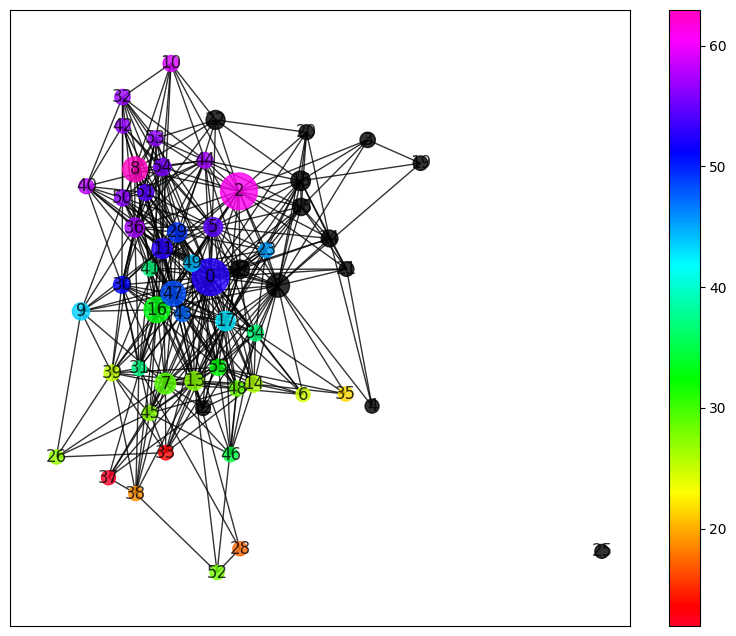

In [131]:
cdf = pd.DataFrame(df_unscaled_combined['UK_voteshare19'])
eps=0.64
bm1=pbm.BallMapper(X=bmx1, eps=eps, coloring_df=cdf)
hsvp = cm.get_cmap("gist_rainbow")
plt.figure(figsize=(10, 8))
bm1.draw_networkx(coloring_variable='UK_voteshare19',color_palette=hsvp, colorbar=True, pos=nx.spring_layout(bm1.Graph,k=0.4, seed=4))


#### 2015

/Users/elliebarranbeck/ERP clean/.venv/lib/python3.9/site-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


<Axes: >

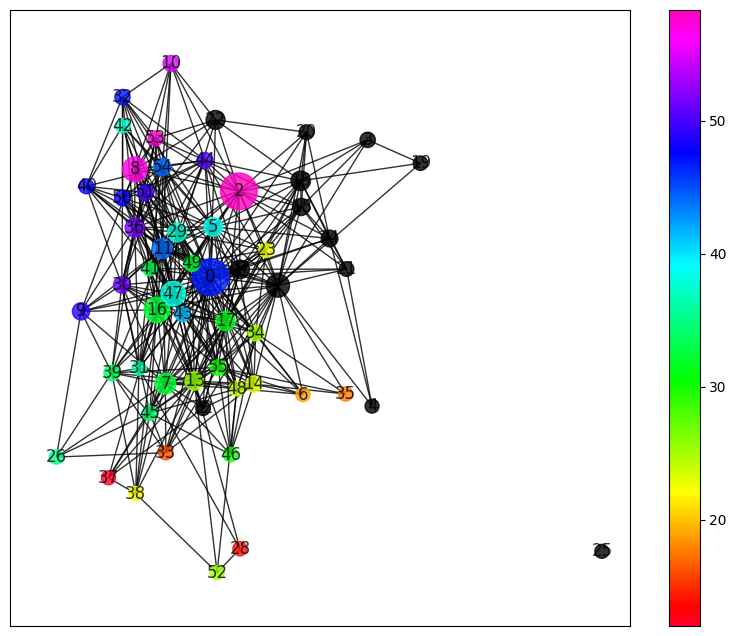

In [132]:
cdf = pd.DataFrame(df_unscaled_combined['UK_voteshare15'])
eps=0.64
bm1=pbm.BallMapper(X=bmx1, eps=eps, coloring_df=cdf)
hsvp = cm.get_cmap("gist_rainbow")
plt.figure(figsize=(10, 8))
bm1.draw_networkx(coloring_variable='UK_voteshare15',color_palette=hsvp, colorbar=True, pos=nx.spring_layout(bm1.Graph,k=0.4,seed=4))

### US

#### 2016

/Users/elliebarranbeck/ERP clean/.venv/lib/python3.9/site-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


<Axes: >

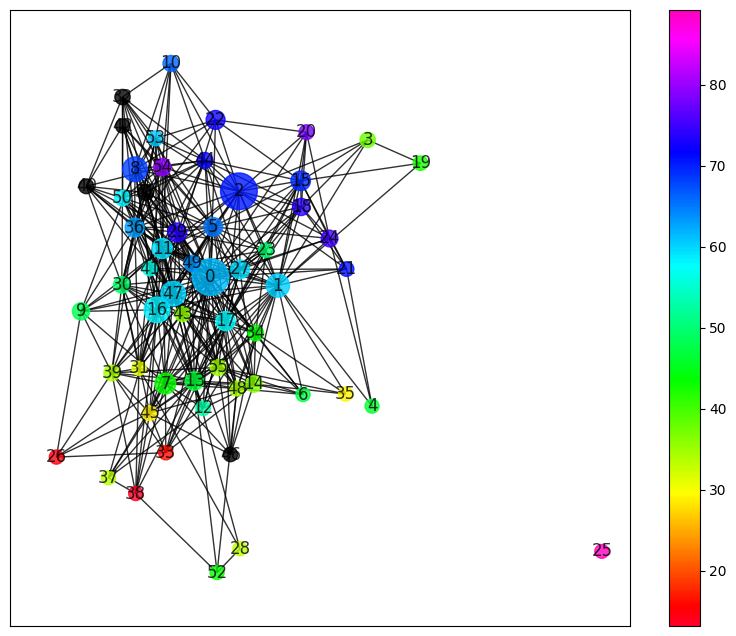

In [133]:
cdf = pd.DataFrame(df_unscaled_combined['US_voteshare16'])
eps=0.64
bm1=pbm.BallMapper(X=bmx1, eps=eps, coloring_df=cdf)
hsvp = cm.get_cmap("gist_rainbow")
plt.figure(figsize=(10, 8))
bm1.draw_networkx(coloring_variable='US_voteshare16',color_palette=hsvp, colorbar=True, pos=nx.spring_layout(bm1.Graph,k=0.4,seed=4))


#### 2012

/Users/elliebarranbeck/ERP clean/.venv/lib/python3.9/site-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


<Axes: >

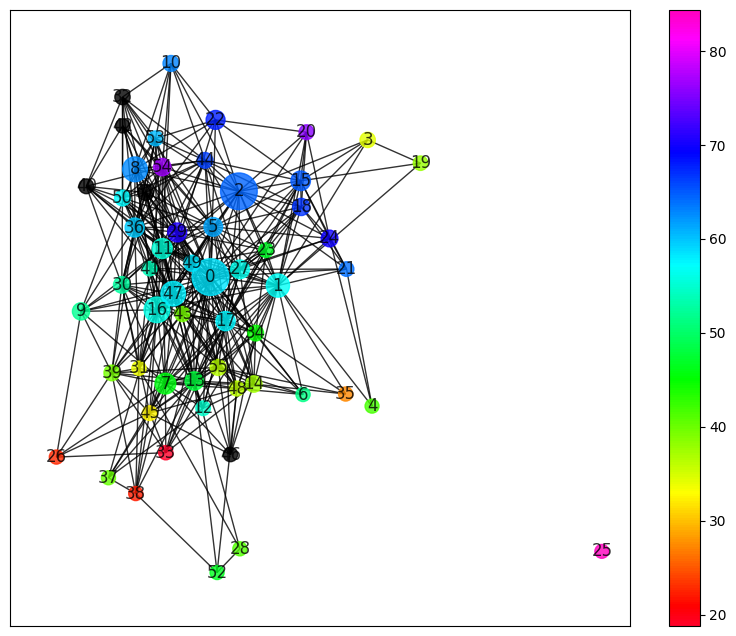

In [134]:
cdf = pd.DataFrame(df_unscaled_combined['US_voteshare12'])
eps=0.64
bm1=pbm.BallMapper(X=bmx1, eps=eps, coloring_df=cdf)
hsvp = cm.get_cmap("gist_rainbow")
plt.figure(figsize=(10, 8))
bm1.draw_networkx(coloring_variable='US_voteshare12',color_palette=hsvp, colorbar=True, pos=nx.spring_layout(bm1.Graph,k=0.4,seed=4))


### Gains

/Users/elliebarranbeck/ERP clean/.venv/lib/python3.9/site-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


<Axes: >

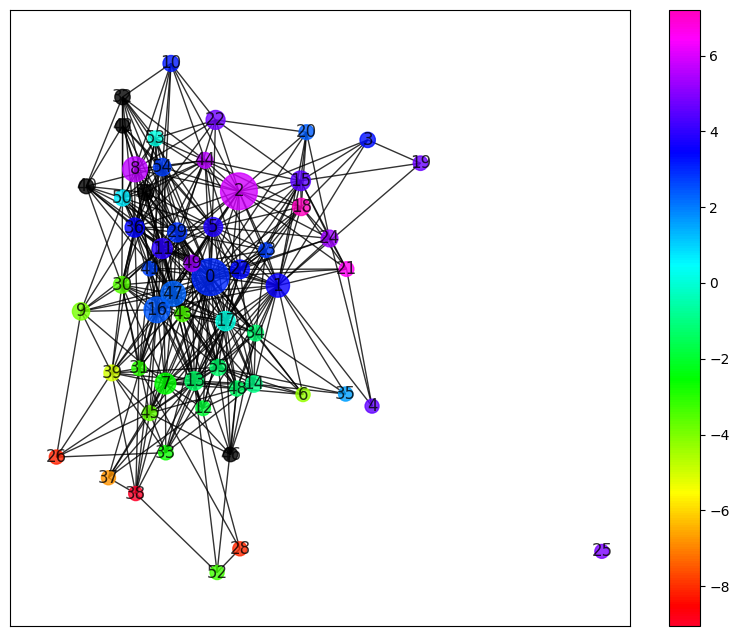

In [135]:
cdf = pd.DataFrame(df_unscaled_combined['US_votegains'])
eps=0.64
bm1=pbm.BallMapper(X=bmx1, eps=eps, coloring_df=cdf)
hsvp = cm.get_cmap("gist_rainbow")
plt.figure(figsize=(10, 8))
bm1.draw_networkx(coloring_variable='US_votegains',color_palette=hsvp, colorbar=True, pos=nx.spring_layout(bm1.Graph,k=0.4,seed=4))


/Users/elliebarranbeck/ERP clean/.venv/lib/python3.9/site-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


<Axes: >

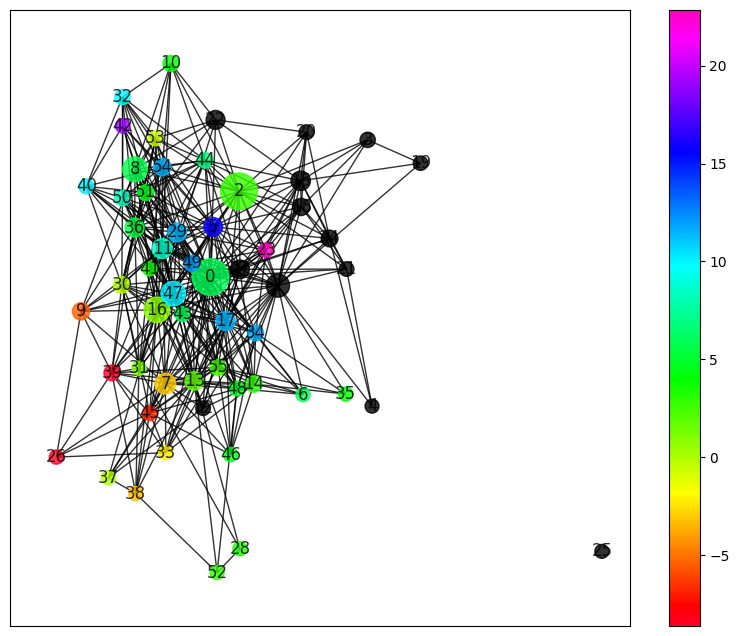

In [136]:
cdf = pd.DataFrame(df_unscaled_combined['UK_votegains'])
eps=0.64
bm1=pbm.BallMapper(X=bmx1, eps=eps, coloring_df=cdf)
hsvp = cm.get_cmap("gist_rainbow")
plt.figure(figsize=(10, 8))
bm1.draw_networkx(coloring_variable='UK_votegains',color_palette=hsvp, colorbar=True, pos=nx.spring_layout(bm1.Graph,k=0.4,seed=4))


## Analysing the balls

In [137]:
pb1 = bm1.points_and_balls()
df_unscaled_combined['point'] = df_unscaled_combined.index
df_unscaled_combined = df_unscaled_combined.merge(pb1, on='point')

### Number of constituencies and counties in each ball

In [138]:
data=df_unscaled_combined
uk_data = data[data['UK'] == 1]

# Create a DataFrame with only US points
us_data = data[data['UK'] == 0]

# Group by 'ball' and count the number of points for UK
uk_points = uk_data.groupby('ball').size().reset_index(name='UK_points')

# Group by 'ball' and count the number of points for US
us_points = us_data.groupby('ball').size().reset_index(name='US_points')

# Merge UK and US points into a single DataFrame
result = pd.merge(uk_points, us_points, on='ball', how='outer').fillna(0)

# Convert the counts to integers (in case of NaN)
result['UK_points'] = result['UK_points'].astype(int)
result['US_points'] = result['US_points'].astype(int)

# Print the result
print(result)

    ball  UK_points  US_points
0      0         51       1783
1      1          0        549
2      2          2       1823
3      3          0         65
4      4          0          4
5      5         20        229
6      6          1         11
7      7         31        343
8      8          1        665
9      9          4        162
10    10          3         92
11    11        113        211
12    12          0         32
13    13         15        216
14    14         11        109
15    15          0        298
16    16          5        732
17    17         18        264
18    18          0        164
19    19          0         26
20    20          0         44
21    21          0         33
22    22          0        262
23    23          1         31
24    24          0        138
25    25          0          1
26    26          3          9
27    27          0        247
28    28          3          6
29    29        263          1
30    30         82         49
31    31

## Appendix

In [142]:
bmx1=df_combined[['Under18', '18to24', '25to34', '35to49', '50to64',
       'Over65', 'White', 'Unemployment', 'Poor_fair_health', 'No_qualifications', 'Degree', 'child_poverty', 'income','Urban']]
columns=['Under18', '18to24', '25to34', '35to49', '50to64',
       'Over65', 'White', 'Unemployment', 'Poor_fair_health', 'No_qualifications', 'Degree', 'child_poverty', 'income','Urban']

/Users/elliebarranbeck/ERP clean/.venv/lib/python3.9/site-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


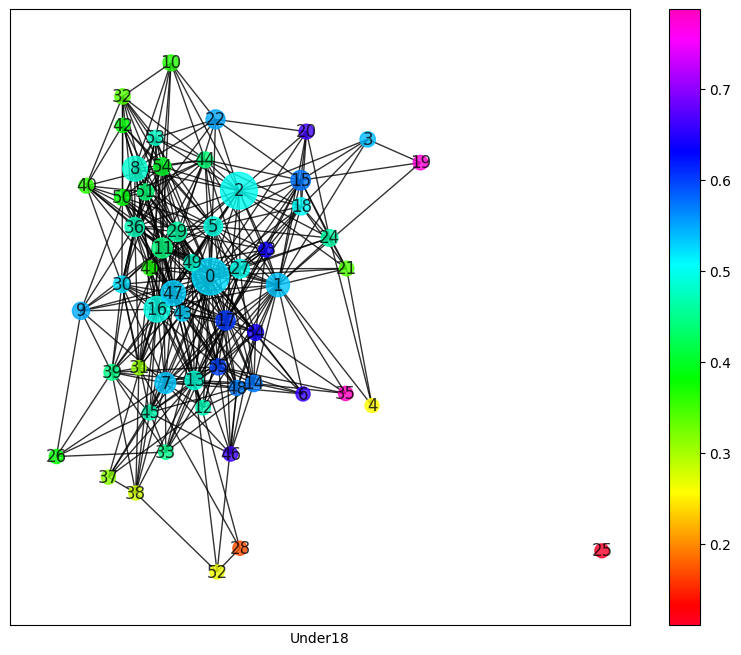

/Users/elliebarranbeck/ERP clean/.venv/lib/python3.9/site-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


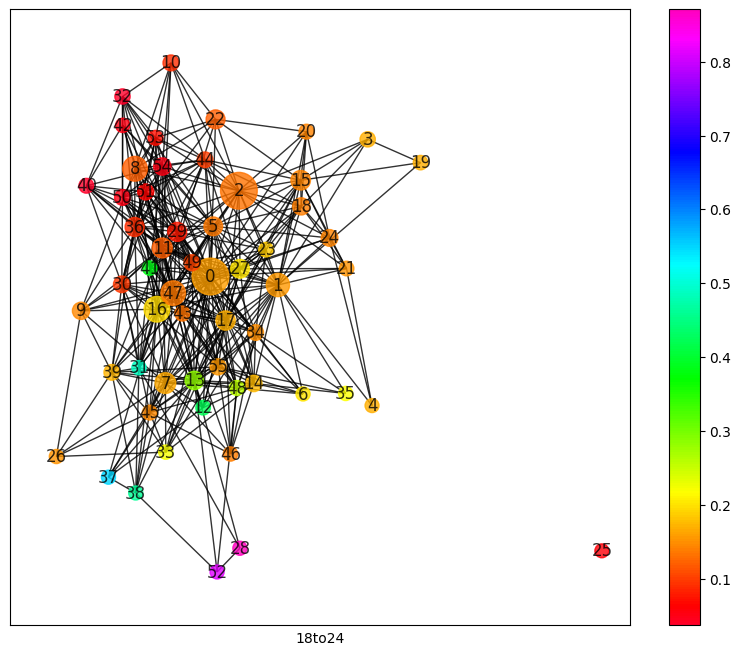

/Users/elliebarranbeck/ERP clean/.venv/lib/python3.9/site-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


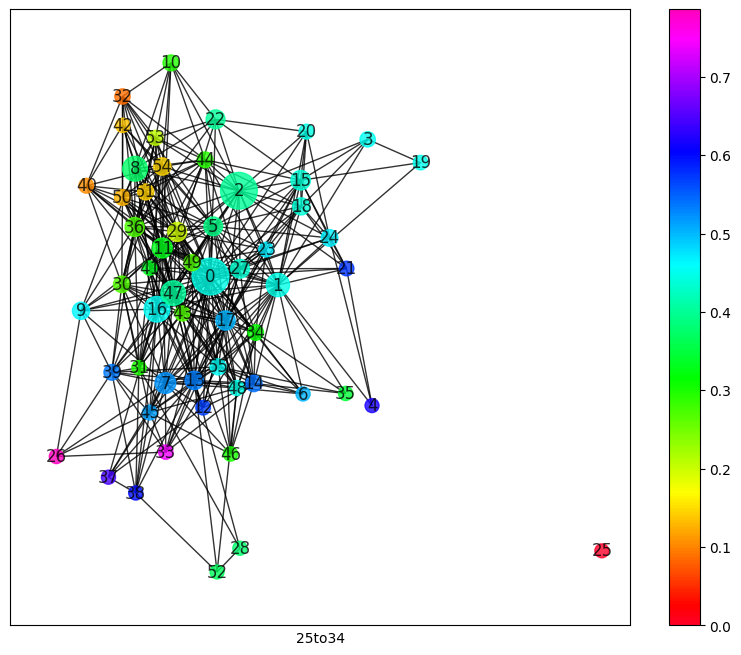

/Users/elliebarranbeck/ERP clean/.venv/lib/python3.9/site-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


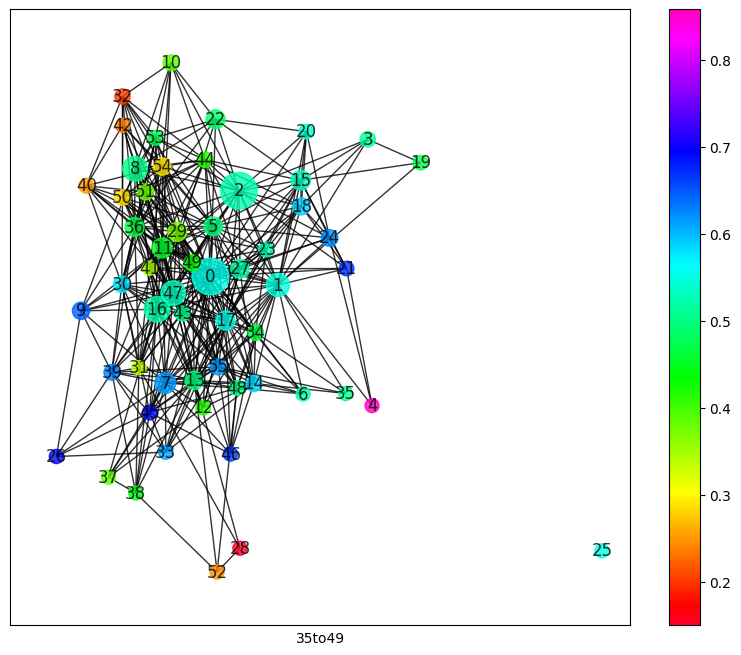

/Users/elliebarranbeck/ERP clean/.venv/lib/python3.9/site-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


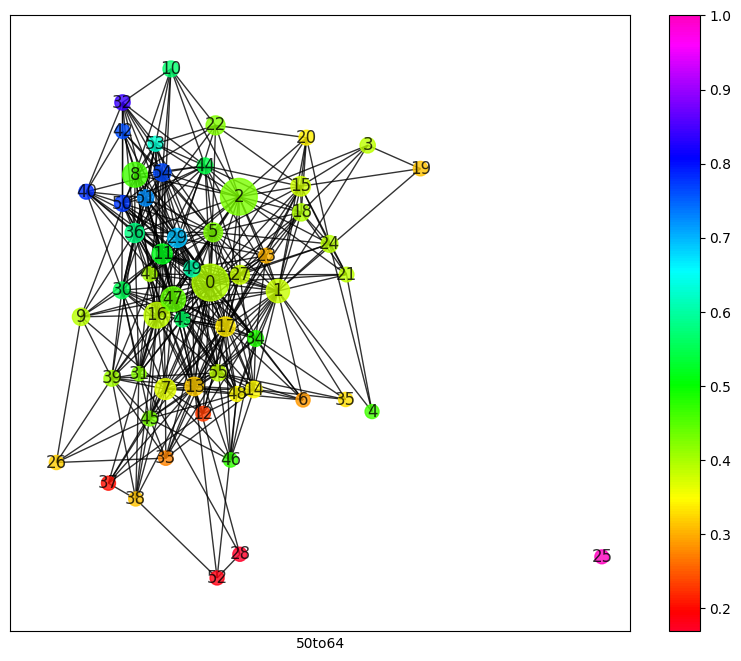

/Users/elliebarranbeck/ERP clean/.venv/lib/python3.9/site-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


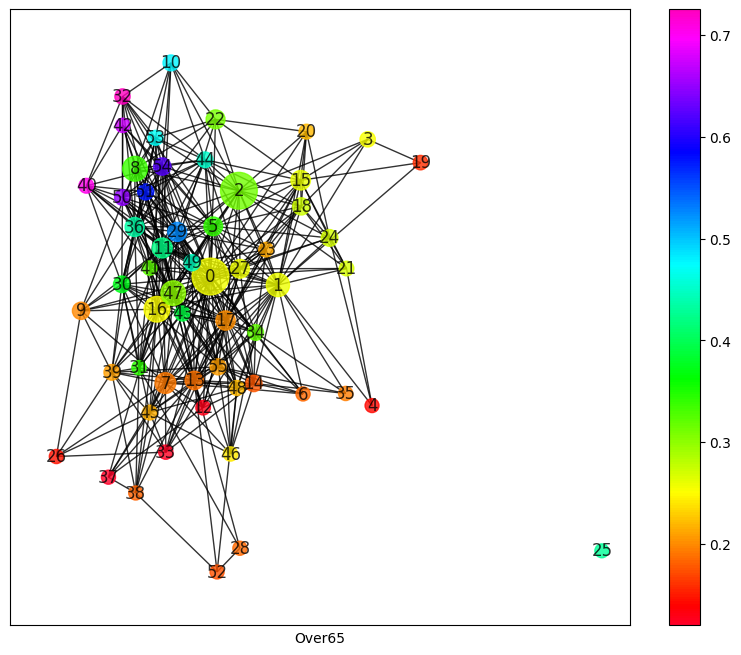

/Users/elliebarranbeck/ERP clean/.venv/lib/python3.9/site-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


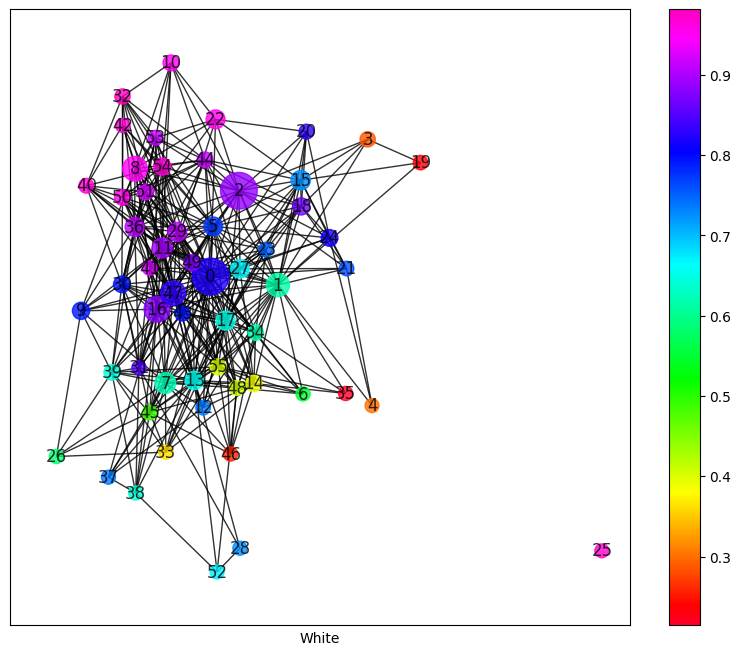

/Users/elliebarranbeck/ERP clean/.venv/lib/python3.9/site-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


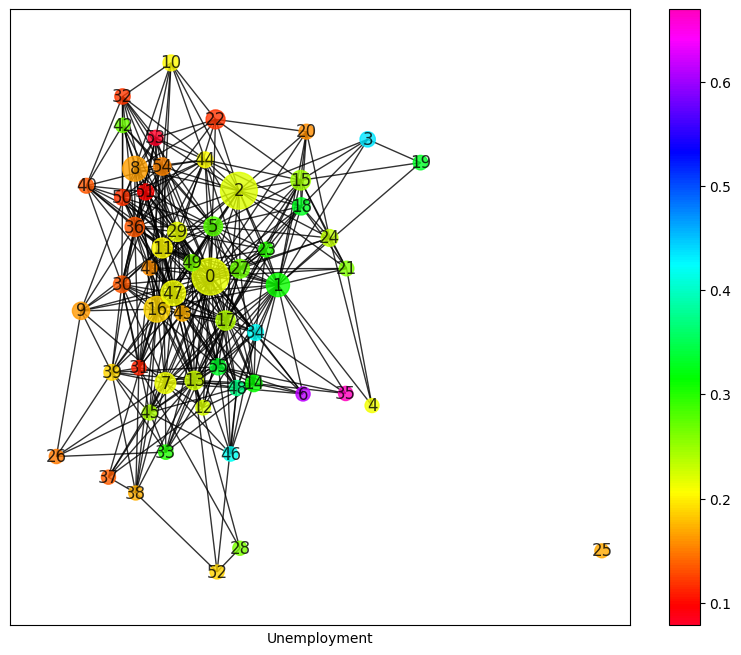

/Users/elliebarranbeck/ERP clean/.venv/lib/python3.9/site-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


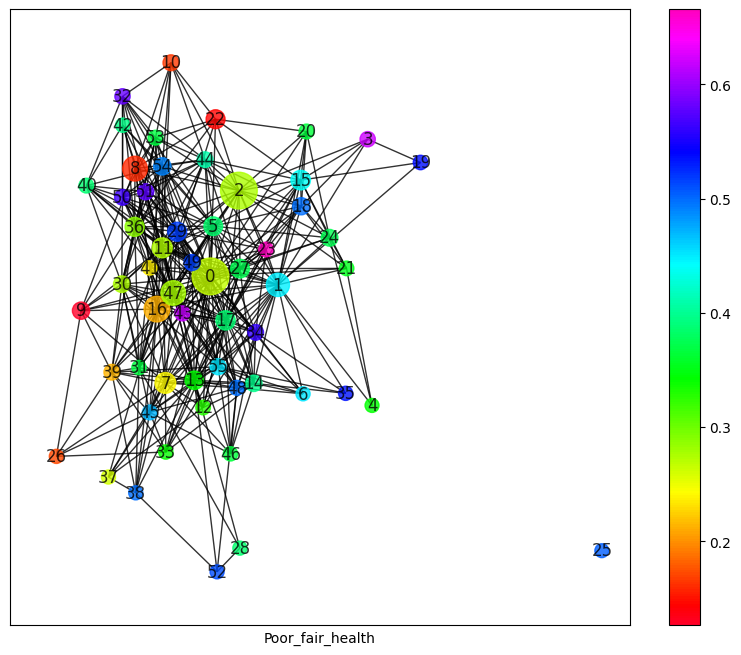

/Users/elliebarranbeck/ERP clean/.venv/lib/python3.9/site-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


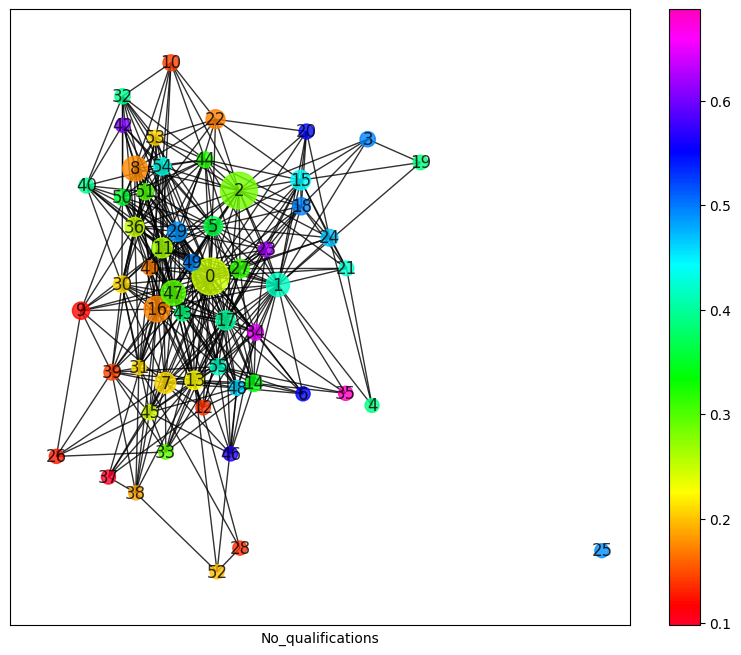

/Users/elliebarranbeck/ERP clean/.venv/lib/python3.9/site-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


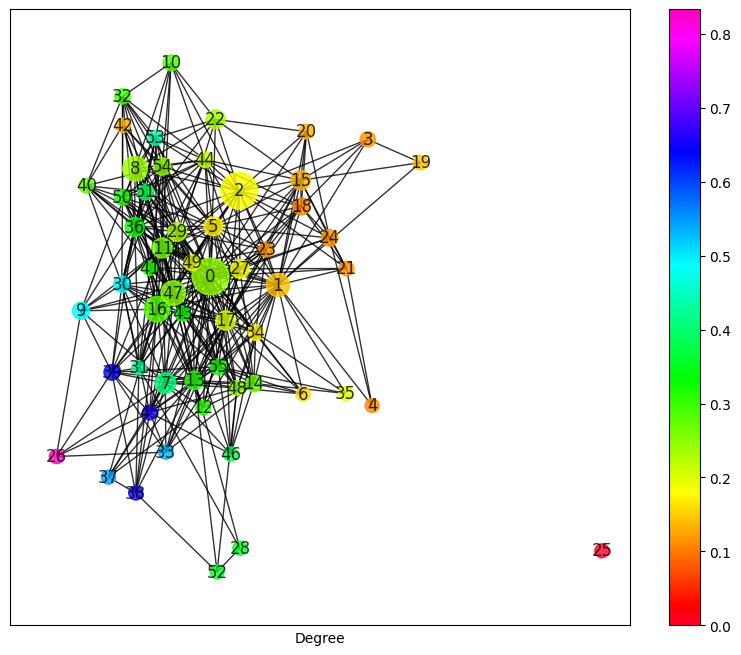

/Users/elliebarranbeck/ERP clean/.venv/lib/python3.9/site-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


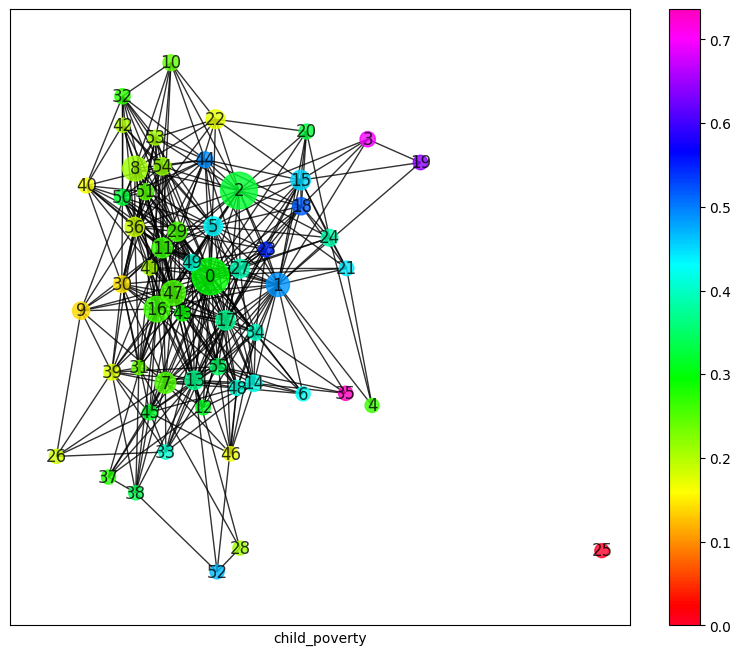

/Users/elliebarranbeck/ERP clean/.venv/lib/python3.9/site-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


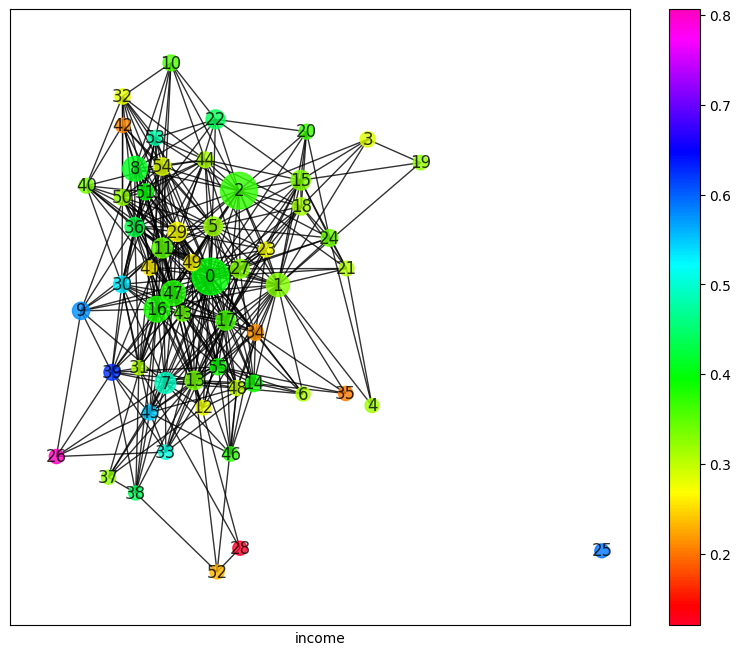

/Users/elliebarranbeck/ERP clean/.venv/lib/python3.9/site-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


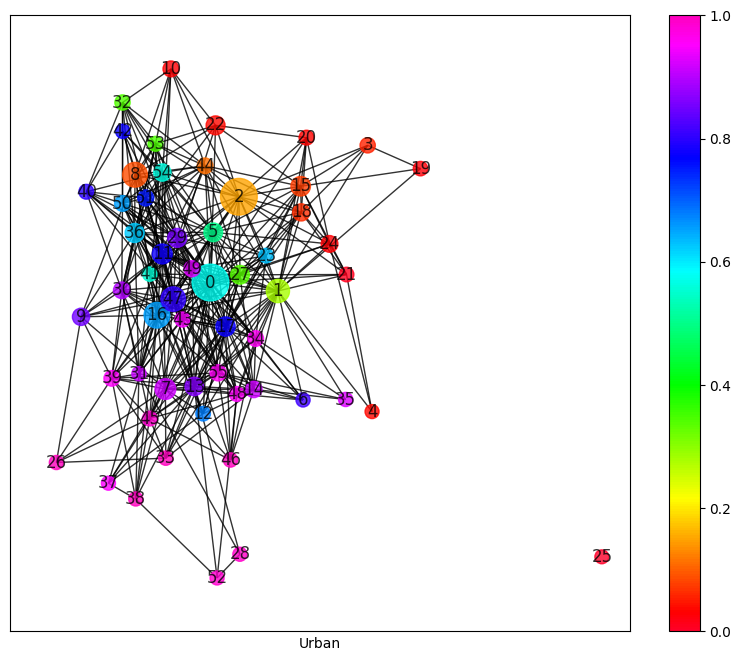

In [143]:
for col in columns:
    cdf = pd.DataFrame(df_combined[col])
    bm1=pbm.BallMapper(X=bmx1, eps=0.64,coloring_df=cdf)
    hsvp = cm.get_cmap("gist_rainbow")
    plt.figure(figsize=(10, 8))
    bm1.draw_networkx(coloring_variable=col,color_palette=hsvp, colorbar=True, pos=nx.spring_layout(bm1.Graph,k=0.4,seed=4))
    plt.xlabel(col)
    plt.show() 